# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [309]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [310]:
# ---------  HACER LA SOLICITUD A LA WEB ---------
url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(url)
html = response.text  # Obtenemos el HTML de la página

# Verificamos el código de estado
if response.status_code == 200:
    print("✅ La solicitud fue exitosa. Código:", response.status_code)
else:
    print("❌ Hubo un problema. Código:", response.status_code)

✅ La solicitud fue exitosa. Código: 200


In [311]:
# --------- PARSEAR EL HTML CON BEAUTIFULSOUP ---------
soup = BeautifulSoup(html, "html.parser")

In [312]:
# --------- BUSCAR LA TABLA ---------
# Vamos a buscar todas las tablas (por si hay más de una)
tablas = soup.find_all("table")
print(f"Se encontraron {len(tablas)} tabla(s)")

# Suponemos que la tabla que queremos es la primera
tabla = tablas[0]  # Puede que sea necesario ajustar esto si hay más tablas

Se encontraron 2 tabla(s)


In [313]:
# ---------  EXTRAER CABECERAS ---------
cabeceras_html = tabla.find_all("th")
cabeceras = [th.text.strip() for th in cabeceras_html]
print(f"Columnas encontradas: {cabeceras}")

Columnas encontradas: ['Year', 'Revenue', 'Change']


In [314]:
# --------- EXTRAER FILAS ---------
filas = tabla.find_all("tr")[1:]  # Saltamos la fila de cabeceras

datos = []
for fila in filas:
    celdas = fila.find_all("td")
    if celdas:  # Verificamos que no esté vacía
        fila_datos = [celda.text.strip() for celda in celdas]
        datos.append(fila_datos)

In [315]:
# --------- CREAR DATAFRAME ---------
df = pd.DataFrame(datos, columns=cabeceras)
print("\nPrimeras filas del DataFrame de la evolución anual:")
df_head = df.head()
df_head


Primeras filas del DataFrame de la evolución anual:


,Year,Revenue,Change
0,2024,$97.15 B,0.39%
1,2023,$96.77 B,18.8%
2,2022,$81.46 B,51.35%
3,2021,$53.82 B,70.67%
4,2020,$31.53 B,28.31%


In [316]:
# Limpiar columna Revenue y convertir a número
df['Revenue'] = df['Revenue'].replace({'\$': '', 'B': '', ',': ''}, regex=True).astype(float)
df

,Year,Revenue,Change
0,2024,97.15,0.39%
1,2023,96.77,18.8%
2,2022,81.46,51.35%
3,2021,53.82,70.67%
4,2020,31.53,28.31%
5,2019,24.57,14.52%
6,2018,21.46,82.51%
7,2017,11.75,67.98%
8,2016,7.00,73.01%
9,2015,4.04,26.5%


In [317]:
# Crear conexión a SQLite (crea archivo si no existe)
conn = sqlite3.connect('empresas.db')

In [318]:
# Guardar DataFrame como tabla 'Annual revenues'
df.to_sql('Annual revenues', conn, if_exists='replace', index=False)

16

In [319]:
#Leer desde SQL para verificar
df_sql = pd.read_sql('SELECT * FROM revenues', conn)
print("\nDatos desde SQLite:")
print(df_sql.head())


Datos desde SQLite:
   Year  Revenue  Change
0  2024    97.15   0.39%
1  2023    96.77   18.8%
2  2022    81.46  51.35%
3  2021    53.82  70.67%
4  2020    31.53  28.31%


In [320]:
# Cerrar conexión
conn.close()

### Gráfico de Evolucio Anual

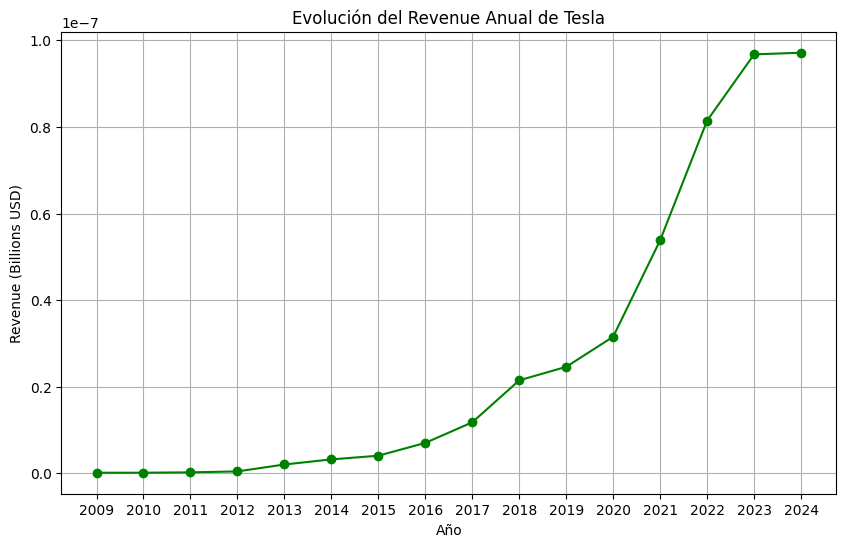

In [321]:
# Ordenar por año (de menor a mayor)
df_sorted = df.sort_values('Year')  # Ordena ascendente por defecto

# Gráfico de línea para Revenue
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Year'], df_sorted['Revenue'] / 1_000_000_000, marker='o', color='green')  # Revenue en Billions
plt.title('Evolución del Revenue Anual de Tesla')
plt.xlabel('Año')
plt.ylabel('Revenue (Billions USD)')
plt.grid(True)
plt.show()

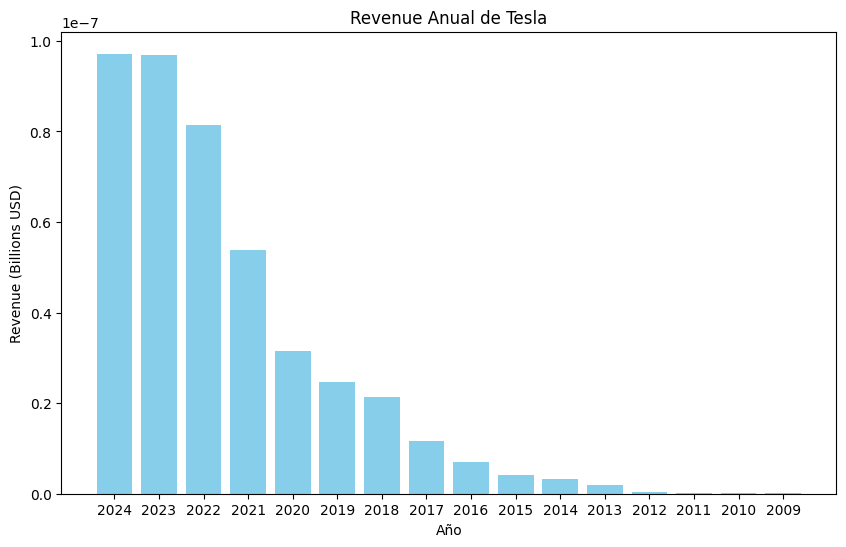